In [ ]:
!pip install sastrawi
!pip install keras

In [14]:
import pandas as pd
import datetime as dt
import string
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import re
import requests
import regex as re
from io import StringIO
import tensorflow as tf

In [16]:
from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import classification_report
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.sequence import pad_sequences
pd.options.mode.chained_assignment = None

seed = 0
np.random.seed(seed)

In [17]:
import nltk  # Import pustaka NLTK (Natural Language Toolkit).
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\iki_rhmn\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\iki_rhmn\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\iki_rhmn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

#Scraping Dataset

# Loading Dataset

In [21]:
app_reviews_df = pd.read_csv('ulasan_aplikasi.csv')
app_reviews_df.shape
app_reviews_df.head()

reviewId         userName  \
0  9af30a9f-37e5-4c80-9eea-a4af87f9f4b7  Pengguna Google   
1  9bd15e3b-7ae1-4827-af1c-f80b9aea4fa2  Pengguna Google   
2  04893854-ffc4-4a5a-bd53-18dda4879354  Pengguna Google   
3  32d316bf-a701-4017-9746-8c3b71dc0892  Pengguna Google   
4  b541e597-ea22-4560-a4c2-a46643e719e1  Pengguna Google   

                                           userImage  \
0  https://play-lh.googleusercontent.com/EGemoI2N...   
1  https://play-lh.googleusercontent.com/EGemoI2N...   
2  https://play-lh.googleusercontent.com/EGemoI2N...   
3  https://play-lh.googleusercontent.com/EGemoI2N...   
4  https://play-lh.googleusercontent.com/EGemoI2N...   

                                             content  score  thumbsUpCount  \
0  bagus sih bagus ,tapi tolong bug nya di perbai...      5           1364   
1  tiap main rank pasti aja ada player beban/male...      1          16776   
2  jika setiap update game rank nya selalu saja m...      2            493   
3  Bintang 3 aja moonton, grafik sudah oke, efek ...      3           1384   
4  kemarin install lagi ini game dengan harapan s...      1            486   

  reviewCreatedVersion                   at  \
0         1.9.64.10601  2025-04-09 11:13:04   
1         1.9.65.10602  2025-03-28 15:42:15   
2         1.9.65.10602  2025-03-30 16:27:41   
3         1.9.65.10602  2025-03-29 18:36:17   
4         1.9.65.10602  2025-03-28 23:50:06   

                                        replyContent            repliedAt  \
0                                                NaN                  NaN   
1                                                NaN                  NaN   
2                                                NaN                  NaN   
3  Halo Kak,\nKami berkomitmen untuk menciptakan ...  2025-01-04 04:00:00   
4                                                NaN                  NaN   

     appVersion  
0  1.9.64.10601  
1  1.9.65.10602  
2  1.9.65.10602  
3  1.9.65.10602  
4  1.9.65.10602

In [22]:
# Menghitung jumlah baris dan kolom dalam DataFrame
jumlah_ulasan, jumlah_kolom = app_reviews_df.shape

In [23]:
app_reviews_df

reviewId              userName  \
0      9af30a9f-37e5-4c80-9eea-a4af87f9f4b7       Pengguna Google   
1      9bd15e3b-7ae1-4827-af1c-f80b9aea4fa2       Pengguna Google   
2      04893854-ffc4-4a5a-bd53-18dda4879354       Pengguna Google   
3      32d316bf-a701-4017-9746-8c3b71dc0892       Pengguna Google   
4      b541e597-ea22-4560-a4c2-a46643e719e1       Pengguna Google   
...                                     ...                   ...   
49995  8ace76cd-a09f-4d87-801e-98ac3cdca8a5       Pengguna Google   
49996  39d1c1a7-a09f-458a-a7b1-8b5d87d48318              ClarxNzy   
49997  9a3327d3-5967-4a8a-a130-d8a162af004f  Tsaqif Nafi'urrahman   
49998  e8189167-2aae-428a-9aeb-606978dca8eb          Zaidul Bahri   
49999  dfdfd72c-17b7-4222-b44a-efda3c0d2999      Trananda Zhafran   

                                               userImage  \
0      https://play-lh.googleusercontent.com/EGemoI2N...   
1      https://play-lh.googleusercontent.com/EGemoI2N...   
2      https://play-lh.googleusercontent.com/EGemoI2N...   
3      https://play-lh.googleusercontent.com/EGemoI2N...   
4      https://play-lh.googleusercontent.com/EGemoI2N...   
...                                                  ...   
49995  https://play-lh.googleusercontent.com/EGemoI2N...   
49996  https://play-lh.googleusercontent.com/a-/ALV-U...   
49997  https://play-lh.googleusercontent.com/a-/ALV-U...   
49998  https://play-lh.googleusercontent.com/a/ACg8oc...   
49999  https://play-lh.googleusercontent.com/a-/ALV-U...   

                                                 content  score  \
0      bagus sih bagus ,tapi tolong bug nya di perbai...      5   
1      tiap main rank pasti aja ada player beban/male...      1   
2      jika setiap update game rank nya selalu saja m...      2   
3      Bintang 3 aja moonton, grafik sudah oke, efek ...      3   
4      kemarin install lagi ini game dengan harapan s...      1   
...                                                  ...    ...   
49995  Saya kasih 4 bintang dulu, soalnya setelah mel...      4   
49996  Hallo developer moonton! Saya sebagai player s...      1   
49997  Masih ada bug layarnya, pas main classic minda...      4   
49998  Mohon agar wr classic dan wr rank dikembalikan...      1   
49999  Saran saja buat para gamer yang suka lag saat ...      5   

       thumbsUpCount reviewCreatedVersion                   at  \
0               1364         1.9.64.10601  2025-04-09 11:13:04   
1              16776         1.9.65.10602  2025-03-28 15:42:15   
2                493         1.9.65.10602  2025-03-30 16:27:41   
3               1384         1.9.65.10602  2025-03-29 18:36:17   
4                486         1.9.65.10602  2025-03-28 23:50:06   
...              ...                  ...                  ...   
49995             52          1.4.12.4363  2019-09-12 11:30:49   
49996              8          1.7.44.8111  2023-01-17 15:15:28   
49997              1          1.4.94.5372  2020-07-30 14:14:49   
49998              0          1.6.95.7592  2022-11-25 15:22:47   
49999              0          1.4.77.5175  2020-05-18 12:35:38   

                                            replyContent            repliedAt  \
0                                                    NaN                  NaN   
1                                                    NaN                  NaN   
2                                                    NaN                  NaN   
3      Halo Kak,\nKami berkomitmen untuk menciptakan ...  2025-01-04 04:00:00   
4                                                    NaN                  NaN   
...                                                  ...                  ...   
49995                                                NaN                  NaN   
49996                                                NaN                  NaN   
49997                                                NaN                  NaN   
49998                                                NaN                  NaN

In [ ]:
app_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              50000 non-null  object        
 1   userName              50000 non-null  object        
 2   userImage             50000 non-null  object        
 3   content               50000 non-null  object        
 4   score                 50000 non-null  int64         
 5   thumbsUpCount         50000 non-null  int64         
 6   reviewCreatedVersion  43168 non-null  object        
 7   at                    50000 non-null  datetime64[ns]
 8   replyContent          2352 non-null   object        
 9   repliedAt             2352 non-null   datetime64[ns]
 10  appVersion            43168 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 4.2+ MB


In [24]:
# Hapus kolom 'replyContent' dan 'repliedAt' jika ada
if 'replyContent' in app_reviews_df.columns:
    app_reviews_df = app_reviews_df.drop('replyContent', axis=1)
if 'repliedAt' in app_reviews_df.columns:
    app_reviews_df = app_reviews_df.drop('repliedAt', axis=1)
if 'reviewCreatedVersion' in app_reviews_df.columns:
    app_reviews_df = app_reviews_df.drop('reviewCreatedVersion', axis=1)
if 'appVersion' in app_reviews_df.columns:
    app_reviews_df = app_reviews_df.drop('appVersion', axis=1)



In [25]:
# Membuat DataFrame baru (clean_df) dengan menghapus baris yang memiliki nilai yang hilang (NaN) dari app_reviews_df
clean_df = app_reviews_df.dropna()

In [26]:
# Menampilkan informasi tentang DataFrame clean_df setelah membersihkan nilai yang hilang (NaN)
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   reviewId       50000 non-null  object
 1   userName       50000 non-null  object
 2   userImage      50000 non-null  object
 3   content        50000 non-null  object
 4   score          50000 non-null  int64 
 5   thumbsUpCount  50000 non-null  int64 
 6   at             50000 non-null  object
dtypes: int64(2), object(5)
memory usage: 2.7+ MB


In [27]:
# Menghapus baris duplikat dari DataFrame clean_df
clean_df = clean_df.drop_duplicates()

# Menghitung jumlah baris dan kolom dalam DataFrame clean_df setelah menghapus duplikat
jumlah_ulasan_setelah_hapus_duplikat, jumlah_kolom_setelah_hapus_duplikat = clean_df.shape

In [28]:
print(f"Jumlah Baris setelah hapus duplikat: {jumlah_ulasan_setelah_hapus_duplikat}")
print(f"Jumlah Kolom setelah hapus duplikat: {jumlah_kolom_setelah_hapus_duplikat}")


Jumlah Baris setelah hapus duplikat: 50000
Jumlah Kolom setelah hapus duplikat: 7


Preprocessing

In [29]:
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # remove mentions
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # remove hashtag
    text = re.sub(r'RT[\s]', '', text) # remove RT
    text = re.sub(r"http\S+", '', text) # remove link
    text = re.sub(r'[0-9]+', '', text) # remove numbers
    text = re.sub(r'[^\w\s]', '', text) # remove numbers


    text = text.replace('\n', ' ') # replace new line into space
    text = text.translate(str.maketrans('', '', string.punctuation)) # remove all punctuations
    text = text.strip(' ') # remove characters space from both left and right text
    return text

def casefoldingText(text): # Converting all the characters in a text into lower case
    text = text.lower()
    return text

def tokenizingText(text): # Tokenizing or splitting a string, text into a list of tokens
    text = word_tokenize(text)
    return text

def filteringText(text): # Remove stopwors in a text
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy"])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

def stemmingText(text): # Reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words
    # Membuat objek stemmer
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    # Memecah teks menjadi daftar kata
    words = text.split()

    # Menerapkan stemming pada setiap kata dalam daftar
    stemmed_words = [stemmer.stem(word) for word in words]

    # Menggabungkan kata-kata yang telah distem
    stemmed_text = ' '.join(stemmed_words)

    return stemmed_text

    return stemmed_text
def toSentence(list_words): # Convert list of words into sentence
    sentence = ' '.join(word for word in list_words)
    return sentence

In [30]:
slangwords = {"@": "di", "abis": "habis", "wtb": "beli", "masi": "masih", "wts": "jual", "wtt": "tukar", "bgt": "banget", "maks": "maksimal", "plisss": "tolong", "bgttt": "banget", "indo": "indonesia", "bgtt": "banget", "ad": "ada", "rv": "redvelvet", "plis": "tolong", "pls": "tolong", "cr": "sumber", "cod": "bayar ditempat", "adlh": "adalah", "afaik": "as far as i know", "ahaha": "haha", "aj": "saja", "ajep-ajep": "dunia gemerlap", "ak": "saya", "akika": "aku", "akkoh": "aku", "akuwh": "aku", "alay": "norak", "alow": "halo", "ambilin": "ambilkan", "ancur": "hancur", "anjrit": "anjing", "anter": "antar", "ap2": "apa-apa", "apasih": "apa sih", "apes": "sial", "aps": "apa", "aq": "saya", "aquwh": "aku", "asbun": "asal bunyi", "aseekk": "asyik", "asekk": "asyik", "asem": "asam", "aspal": "asli tetapi palsu", "astul": "asal tulis", "ato": "atau", "au ah": "tidak mau tahu", "awak": "saya", "ay": "sayang", "ayank": "sayang", "b4": "sebelum", "bakalan": "akan", "bandes": "bantuan desa", "bangedh": "banget", "banpol": "bantuan polisi", "banpur": "bantuan tempur", "basbang": "basi", "bcanda": "bercanda", "bdg": "bandung", "begajulan": "nakal", "beliin": "belikan", "bencong": "banci", "bentar": "sebentar", "ber3": "bertiga", "beresin": "membereskan", "bete": "bosan", "beud": "banget", "bg": "abang", "bgmn": "bagaimana", "bgt": "banget", "bijimane": "bagaimana", "bintal": "bimbingan mental", "bkl": "akan", "bknnya": "bukannya", "blegug": "bodoh", "blh": "boleh", "bln": "bulan", "blum": "belum", "bnci": "benci", "bnran": "yang benar", "bodor": "lucu", "bokap": "ayah", "boker": "buang air besar", "bokis": "bohong", "boljug": "boleh juga", "bonek": "bocah nekat", "boyeh": "boleh", "br": "baru", "brg": "bareng", "bro": "saudara laki-laki", "bru": "baru", "bs": "bisa", "bsen": "bosan", "bt": "buat", "btw": "ngomong-ngomong", "buaya": "tidak setia", "bubbu": "tidur", "bubu": "tidur", "bumil": "ibu hamil", "bw": "bawa", "bwt": "buat", "byk": "banyak", "byrin": "bayarkan", "cabal": "sabar", "cadas": "keren", "calo": "makelar", "can": "belum", "capcus": "pergi", "caper": "cari perhatian", "ce": "cewek", "cekal": "cegah tangkal", "cemen": "penakut", "cengengesan": "tertawa", "cepet": "cepat", "cew": "cewek", "chuyunk": "sayang", "cimeng": "ganja", "cipika cipiki": "cium pipi kanan cium pipi kiri", "ciyh": "sih", "ckepp": "cakep", "ckp": "cakep", "cmiiw": "correct me if i'm wrong", "cmpur": "campur", "cong": "banci", "conlok": "cinta lokasi", "cowwyy": "maaf", "cp": "siapa", "cpe": "capek", "cppe": "capek", "cucok": "cocok", "cuex": "cuek", "cumi": "Cuma miscall", "cups": "culun", "curanmor": "pencurian kendaraan bermotor", "curcol": "curahan hati colongan", "cwek": "cewek", "cyin": "cinta", "d": "di", "dah": "deh", "dapet": "dapat", "de": "adik", "dek": "adik", "demen": "suka", "deyh": "deh", "dgn": "dengan", "diancurin": "dihancurkan", "dimaafin": "dimaafkan", "dimintak": "diminta", "disono": "di sana", "dket": "dekat", "dkk": "dan kawan-kawan", "dll": "dan lain-lain", "dlu": "dulu", "dngn": "dengan", "dodol": "bodoh", "doku": "uang", "dongs": "dong", "dpt": "dapat", "dri": "dari", "drmn": "darimana", "drtd": "dari tadi", "dst": "dan seterusnya", "dtg": "datang", "duh": "aduh", "duren": "durian", "ed": "edisi", "egp": "emang gue pikirin", "eke": "aku", "elu": "kamu", "emangnya": "memangnya", "emng": "memang", "endak": "tidak", "enggak": "tidak", "envy": "iri", "ex": "mantan", "fax": "facsimile", "fifo": "first in first out", "folbek": "follow back", "fyi": "sebagai informasi", "gaada": "tidak ada uang", "gag": "tidak", "gaje": "tidak jelas", "gak papa": "tidak apa-apa", "gan": "juragan", "gaptek": "gagap teknologi", "gatek": "gagap teknologi", "gawe": "kerja", "gbs": "tidak bisa", "gebetan": "orang yang disuka", "geje": "tidak jelas", "gepeng": "gelandangan dan pengemis", "ghiy": "lagi", "gile": "gila", "gimana": "bagaimana", "gino": "gigi nongol", "githu": "gitu", "gj": "tidak jelas", "gmana": "bagaimana", "gn": "begini", "goblok": "bodoh", "golput": "golongan putih", "gowes": "mengayuh sepeda", "gpny": "tidak punya", "gr": "gede rasa", "gretongan": "gratisan", "gtau": "tidak tahu", "gua": "saya", "guoblok": "goblok", "gw": "saya", "ha": "tertawa", "haha": "tertawa", "hallow": "halo", "hankam": "pertahanan dan keamanan", "hehe": "he", "helo": "halo", "hey": "hai", "hlm": "halaman", "hny": "hanya", "hoax": "isu bohong", "hr": "hari", "hrus": "harus", "hubdar": "perhubungan darat", "huff": "mengeluh", "hum": "rumah", "humz": "rumah", "ilang": "hilang", "ilfil": "tidak suka", "imho": "in my humble opinion", "imoetz": "imut", "item": "hitam", "itungan": "hitungan", "iye": "iya", "ja": "saja", "jadiin": "jadi", "jaim": "jaga image", "jayus": "tidak lucu", "jdi": "jadi", "jem": "jam", "jga": "juga", "jgnkan": "jangankan", "jir": "anjing", "jln": "jalan", "jomblo": "tidak punya pacar", "jubir": "juru bicara", "jutek": "galak", "k": "ke", "kab": "kabupaten", "kabor": "kabur", "kacrut": "kacau", "kadiv": "kepala divisi", "kagak": "tidak", "kalo": "kalau", "kampret": "sialan", "kamtibmas": "keamanan dan ketertiban masyarakat", "kamuwh": "kamu", "kanwil": "kantor wilayah", "karna": "karena", "kasubbag": "kepala subbagian", "katrok": "kampungan", "kayanya": "kayaknya", "kbr": "kabar", "kdu": "harus", "kec": "kecamatan", "kejurnas": "kejuaraan nasional", "kekeuh": "keras kepala", "kel": "kelurahan", "kemaren": "kemarin", "kepengen": "mau", "kepingin": "mau", "kepsek": "kepala sekolah", "kesbang": "kesatuan bangsa", "kesra": "kesejahteraan rakyat", "ketrima": "diterima", "kgiatan": "kegiatan", "kibul": "bohong", "kimpoi": "kawin", "kl": "kalau", "klianz": "kalian", "kloter": "kelompok terbang", "klw": "kalau", "km": "kamu", "kmps": "kampus", "kmrn": "kemarin", "knal": "kenal", "knp": "kenapa", "kodya": "kota madya", "komdis": "komisi disiplin", "komsov": "komunis sovyet", "kongkow": "kumpul bareng teman-teman", "kopdar": "kopi darat", "korup": "korupsi", "kpn": "kapan", "krenz": "keren", "krm": "kirim", "kt": "kita", "ktmu": "ketemu", "ktr": "kantor", "kuper": "kurang pergaulan", "kw": "imitasi", "kyk": "seperti", "la": "lah", "lam": "salam", "lamp": "lampiran", "lanud": "landasan udara", "latgab": "latihan gabungan", "lebay": "berlebihan", "leh": "boleh", "lelet": "lambat", "lemot": "lambat", "lgi": "lagi", "lgsg": "langsung", "liat": "lihat", "litbang": "penelitian dan pengembangan", "lmyn": "lumayan", "lo": "kamu", "loe": "kamu", "lola": "lambat berfikir", "louph": "cinta", "low": "kalau", "lp": "lupa", "luber": "langsung, umum, bebas, dan rahasia", "luchuw": "lucu", "lum": "belum", "luthu": "lucu", "lwn": "lawan", "maacih": "terima kasih", "mabal": "bolos", "macem": "macam", "macih": "masih", "maem": "makan", "magabut": "makan gaji buta", "maho": "homo", "mak jang": "kaget", "maksain": "memaksa", "malem": "malam", "mam": "makan", "maneh": "kamu", "maniez": "manis", "mao": "mau", "masukin": "masukkan", "melu": "ikut", "mepet": "dekat sekali", "mgu": "minggu", "migas": "minyak dan gas bumi", "mikol": "minuman beralkohol", "miras": "minuman keras", "mlah": "malah", "mngkn": "mungkin", "mo": "mau", "mokad": "mati", "moso": "masa", "mpe": "sampai", "msk": "masuk", "mslh": "masalah", "mt": "makan teman", "mubes": "musyawarah besar", "mulu": "melulu", "mumpung": "selagi", "munas": "musyawarah nasional", "muntaber": "muntah dan berak", "musti": "mesti", "muupz": "maaf", "mw": "now watching", "n": "dan", "nanam": "menanam", "nanya": "bertanya", "napa": "kenapa", "napi": "narapidana", "napza": "narkotika, alkohol, psikotropika, dan zat adiktif ", "narkoba": "narkotika, psikotropika, dan obat terlarang", "nasgor": "nasi goreng", "nda": "tidak", "ndiri": "sendiri", "ne": "ini", "nekolin": "neokolonialisme", "nembak": "menyatakan cinta", "ngabuburit": "menunggu berbuka puasa", "ngaku": "mengaku", "ngambil": "mengambil", "nganggur": "tidak punya pekerjaan", "ngapah": "kenapa", "ngaret": "terlambat", "ngasih": "memberikan", "ngebandel": "berbuat bandel", "ngegosip": "bergosip", "ngeklaim": "mengklaim", "ngeksis": "menjadi eksis", "ngeles": "berkilah", "ngelidur": "menggigau", "ngerampok": "merampok", "ngga": "tidak", "ngibul": "berbohong", "ngiler": "mau", "ngiri": "iri", "ngisiin": "mengisikan", "ngmng": "bicara", "ngomong": "bicara", "ngubek2": "mencari-cari", "ngurus": "mengurus", "nie": "ini", "nih": "ini", "niyh": "nih", "nmr": "nomor", "nntn": "nonton", "nobar": "nonton bareng", "np": "now playing", "ntar": "nanti", "ntn": "nonton", "numpuk": "bertumpuk", "nutupin": "menutupi", "nyari": "mencari", "nyekar": "menyekar", "nyicil": "mencicil", "nyoblos": "mencoblos", "nyokap": "ibu", "ogah": "tidak mau", "ol": "online", "ongkir": "ongkos kirim", "oot": "out of topic", "org2": "orang-orang", "ortu": "orang tua", "otda": "otonomi daerah", "otw": "on the way, sedang di jalan", "pacal": "pacar", "pake": "pakai", "pala": "kepala", "pansus": "panitia khusus", "parpol": "partai politik", "pasutri": "pasangan suami istri", "pd": "pada", "pede": "percaya diri", "pelatnas": "pemusatan latihan nasional", "pemda": "pemerintah daerah", "pemkot": "pemerintah kota", "pemred": "pemimpin redaksi", "penjas": "pendidikan jasmani", "perda": "peraturan daerah", "perhatiin": "perhatikan", "pesenan": "pesanan", "pgang": "pegang", "pi": "tapi", "pilkada": "pemilihan kepala daerah", "pisan": "sangat", "pk": "penjahat kelamin", "plg": "paling", "pmrnth": "pemerintah", "polantas": "polisi lalu lintas", "ponpes": "pondok pesantren", "pp": "pulang pergi", "prg": "pergi", "prnh": "pernah", "psen": "pesan", "pst": "pasti", "pswt": "pesawat", "pw": "posisi nyaman", "qmu": "kamu", "rakor": "rapat koordinasi", "ranmor": "kendaraan bermotor", "re": "reply", "ref": "referensi", "rehab": "rehabilitasi", "rempong": "sulit", "repp": "balas", "restik": "reserse narkotika", "rhs": "rahasia", "rmh": "rumah", "ru": "baru", "ruko": "rumah toko", "rusunawa": "rumah susun sewa", "ruz": "terus", "saia": "saya", "salting": "salah tingkah", "sampe": "sampai", "samsek": "sama sekali", "sapose": "siapa", "satpam": "satuan pengamanan", "sbb": "sebagai berikut", "sbh": "sebuah", "sbnrny": "sebenarnya", "scr": "secara", "sdgkn": "sedangkan", "sdkt": "sedikit", "se7": "setuju", "sebelas dua belas": "mirip", "sembako": "sembilan bahan pokok", "sempet": "sempat", "sendratari": "seni drama tari", "sgt": "sangat", "shg": "sehingga", "siech": "sih", "sikon": "situasi dan kondisi", "sinetron": "sinema elektronik", "siramin": "siramkan", "sj": "saja", "skalian": "sekalian", "sklh": "sekolah", "skt": "sakit", "slesai": "selesai", "sll": "selalu", "slma": "selama", "slsai": "selesai", "smpt": "sempat", "smw": "semua", "sndiri": "sendiri", "soljum": "sholat jumat", "songong": "sombong", "sory": "maaf", "sosek": "sosial-ekonomi", "sotoy": "sok tahu", "spa": "siapa", "sppa": "siapa", "spt": "seperti", "srtfkt": "sertifikat", "stiap": "setiap", "stlh": "setelah", "suk": "masuk", "sumpek": "sempit", "syg": "sayang", "t4": "tempat", "tajir": "kaya", "tau": "tahu", "taw": "tahu", "td": "tadi", "tdk": "tidak", "teh": "kakak perempuan", "telat": "terlambat", "telmi": "telat berpikir", "temen": "teman", "tengil": "menyebalkan", "tepar": "terkapar", "tggu": "tunggu", "tgu": "tunggu", "thankz": "terima kasih", "thn": "tahun", "tilang": "bukti pelanggaran", "tipiwan": "TvOne", "tks": "terima kasih", "tlp": "telepon", "tls": "tulis", "tmbah": "tambah", "tmen2": "teman-teman", "tmpah": "tumpah", "tmpt": "tempat", "tngu": "tunggu", "tnyta": "ternyata", "tokai": "tai", "toserba": "toko serba ada", "tpi": "tapi", "trdhulu": "terdahulu", "trima": "terima kasih", "trm": "terima", "trs": "terus", "trutama": "terutama", "ts": "penulis", "tst": "tahu sama tahu", "ttg": "tentang", "tuch": "tuh", "tuir": "tua", "tw": "tahu", "u": "kamu", "ud": "sudah", "udah": "sudah", "ujg": "ujung", "ul": "ulangan", "unyu": "lucu", "uplot": "unggah", "urang": "saya", "usah": "perlu", "utk": "untuk", "valas": "valuta asing", "w/": "dengan", "wadir": "wakil direktur", "wamil": "wajib militer", "warkop": "warung kopi", "warteg": "warung tegal", "wat": "buat", "wkt": "waktu", "wtf": "what the fuck", "xixixi": "tertawa", "ya": "iya", "yap": "iya", "yaudah": "ya sudah", "yawdah": "ya sudah", "yg": "yang", "yl": "yang lain", "yo": "iya", "yowes": "ya sudah", "yup": "iya", "7an": "tujuan", "ababil": "abg labil", "acc": "accord", "adlah": "adalah", "adoh": "aduh", "aha": "tertawa", "aing": "saya", "aja": "saja", "ajj": "saja", "aka": "dikenal juga sebagai", "akko": "aku", "akku": "aku", "akyu": "aku", "aljasa": "asal jadi saja", "ama": "sama", "ambl": "ambil", "anjir": "anjing", "ank": "anak", "ap": "apa", "apaan": "apa", "ape": "apa", "aplot": "unggah", "apva": "apa", "aqu": "aku", "asap": "sesegera mungkin", "aseek": "asyik", "asek": "asyik", "aseknya": "asyiknya", "asoy": "asyik", "astrojim": "astagfirullahaladzim", "ath": "kalau begitu", "atuh": "kalau begitu", "ava": "avatar", "aws": "awas", "ayang": "sayang", "ayok": "ayo", "bacot": "banyak bicara", "bales": "balas", "bangdes": "pembangunan desa", "bangkotan": "tua", "banpres": "bantuan presiden", "bansarkas": "bantuan sarana kesehatan", "bazis": "badan amal, zakat, infak, dan sedekah", "bcoz": "karena", "beb": "sayang", "bejibun": "banyak", "belom": "belum", "bener": "benar", "ber2": "berdua", "berdikari": "berdiri di atas kaki sendiri", "bet": "banget", "beti": "beda tipis", "beut": "banget", "bgd": "banget", "bgs": "bagus", "bhubu": "tidur", "bimbuluh": "bimbingan dan penyuluhan", "bisi": "kalau-kalau", "bkn": "bukan", "bl": "beli", "blg": "bilang", "blm": "belum", "bls": "balas", "bnchi": "benci", "bngung": "bingung", "bnyk": "banyak", "bohay": "badan aduhai", "bokep": "porno", "bokin": "pacar", "bole": "boleh", "bolot": "bodoh", "bonyok": "ayah ibu", "bpk": "bapak", "brb": "segera kembali", "brngkt": "berangkat", "brp": "berapa", "brur": "saudara laki-laki", "bsa": "bisa", "bsk": "besok", "bu_bu": "tidur", "bubarin": "bubarkan", "buber": "buka bersama", "bujubune": "luar biasa", "buser": "buru sergap", "bwhn": "bawahan", "byar": "bayar", "byr": "bayar", "c8": "chat", "cabut": "pergi", "caem": "cakep", "cama-cama": "sama-sama", "cangcut": "celana dalam", "cape": "capek", "caur": "jelek", "cekak": "tidak ada uang", "cekidot": "coba lihat", "cemplungin": "cemplungkan", "ceper": "pendek", "ceu": "kakak perempuan", "cewe": "cewek", "cibuk": "sibuk", "cin": "cinta", "ciye": "cie", "ckck": "ck", "clbk": "cinta lama bersemi kembali", "cmpr": "campur", "cnenk": "senang", "congor": "mulut", "cow": "cowok", "coz": "karena", "cpa": "siapa", "gokil": "gila", "gombal": "suka merayu", "gpl": "tidak pakai lama", "gpp": "tidak apa-apa", "gretong": "gratis", "gt": "begitu", "gtw": "tidak tahu", "gue": "saya", "guys": "teman-teman", "gws": "cepat sembuh", "haghaghag": "tertawa", "hakhak": "tertawa", "handak": "bahan peledak", "hansip": "pertahanan sipil", "hellow": "halo", "helow": "halo", "hi": "hai", "hlng": "hilang", "hnya": "hanya", "houm": "rumah", "hrs": "harus", "hubad": "hubungan angkatan darat", "hubla": "perhubungan laut", "huft": "mengeluh", "humas": "hubungan masyarakat", "idk": "saya tidak tahu", "ilfeel": "tidak suka", "imba": "jago sekali", "imoet": "imut", "info": "informasi", "itung": "hitung", "isengin": "bercanda", "iyala": "iya lah", "iyo": "iya", "jablay": "jarang dibelai", "jadul": "jaman dulu", "jancuk": "anjing", "jd": "jadi", "jdikan": "jadikan", "jg": "juga", "jgn": "jangan", "jijay": "jijik", "jkt": "jakarta", "jnj": "janji", "jth": "jatuh", "jurdil": "jujur adil", "jwb": "jawab", "ka": "kakak", "kabag": "kepala bagian", "kacian": "kasihan", "kadit": "kepala direktorat", "kaga": "tidak", "kaka": "kakak", "kamtib": "keamanan dan ketertiban", "kamuh": "kamu", "kamyu": "kamu", "kapt": "kapten", "kasat": "kepala satuan", "kasubbid": "kepala subbidang", "kau": "kamu", "kbar": "kabar", "kcian": "kasihan", "keburu": "terlanjur", "kedubes": "kedutaan besar", "kek": "seperti", "keknya": "kayaknya", "keliatan": "kelihatan", "keneh": "masih", "kepikiran": "terpikirkan", "kepo": "mau tahu urusan orang", "kere": "tidak punya uang", "kesian": "kasihan", "ketauan": "ketahuan", "keukeuh": "keras kepala", "khan": "kan", "kibus": "kaki busuk", "kk": "kakak", "klian": "kalian", "klo": "kalau", "kluarga": "keluarga", "klwrga": "keluarga", "kmari": "kemari", "kmpus": "kampus", "kn": "kan", "knl": "kenal", "knpa": "kenapa", "kog": "kok", "kompi": "komputer", "komtiong": "komunis Tiongkok", "konjen": "konsulat jenderal", "koq": "kok", "kpd": "kepada", "kptsan": "keputusan", "krik": "garing", "krn": "karena", "ktauan": "ketahuan", "ktny": "katanya", "kudu": "harus", "kuq": "kok", "ky": "seperti", "kykny": "kayanya", "laka": "kecelakaan", "lambreta": "lambat", "lansia": "lanjut usia", "lapas": "lembaga pemasyarakatan", "lbur": "libur", "lekong": "laki-laki", "lg": "lagi", "lgkp": "lengkap", "lht": "lihat", "linmas": "perlindungan masyarakat", "lmyan": "lumayan", "lngkp": "lengkap", "loch": "loh", "lol": "tertawa", "lom": "belum", "loupz": "cinta", "lowh": "kamu", "lu": "kamu", "luchu": "lucu", "luff": "cinta", "luph": "cinta", "lw": "kamu", "lwt": "lewat", "maaciw": "terima kasih", "mabes": "markas besar", "macem-macem": "macam-macam", "madesu": "masa depan suram", "maen": "main", "mahatma": "maju sehat bersama", "mak": "ibu", "makasih": "terima kasih", "malah": "bahkan", "malu2in": "memalukan", "mamz": "makan", "manies": "manis", "mantep": "mantap", "markus": "makelar kasus", "mba": "mbak", "mending": "lebih baik", "mgkn": "mungkin", "mhn": "mohon", "miker": "minuman keras", "milis": "mailing list", "mksd": "maksud", "mls": "malas", "mnt": "minta", "moge": "motor gede", "mokat": "mati", "mosok": "masa", "msh": "masih", "mskpn": "meskipun", "msng2": "masing-masing", "muahal": "mahal", "muker": "musyawarah kerja", "mumet": "pusing", "muna": "munafik", "munaslub": "musyawarah nasional luar biasa", "musda": "musyawarah daerah", "muup": "maaf", "muuv": "maaf", "nal": "kenal", "nangis": "menangis", "naon": "apa", "napol": "narapidana politik", "naq": "anak", "narsis": "bangga pada diri sendiri", "nax": "anak", "ndak": "tidak", "ndut": "gendut", "nekolim": "neokolonialisme", "nelfon": "menelepon", "ngabis2in": "menghabiskan", "ngakak": "tertawa", "ngambek": "marah", "ngampus": "pergi ke kampus", "ngantri": "mengantri", "ngapain": "sedang apa", "ngaruh": "berpengaruh", "ngawur": "berbicara sembarangan", "ngeceng": "kumpul bareng-bareng", "ngeh": "sadar", "ngekos": "tinggal di kos", "ngelamar": "melamar", "ngeliat": "melihat", "ngemeng": "bicara terus-terusan", "ngerti": "mengerti", "nggak": "tidak", "ngikut": "ikut", "nginep": "menginap", "ngisi": "mengisi", "ngmg": "bicara", "ngocol": "lucu", "ngomongin": "membicarakan", "ngumpul": "berkumpul", "ni": "ini", "nyasar": "tersesat", "nyariin": "mencari", "nyiapin": "mempersiapkan", "nyiram": "menyiram", "nyok": "ayo", "o/": "oleh", "ok": "ok", "priksa": "periksa", "pro": "profesional", "psn": "pesan", "psti": "pasti", "puanas": "panas", "qmo": "kamu", "qt": "kita", "rame": "ramai", "raskin": "rakyat miskin", "red": "redaksi", "reg": "register", "rejeki": "rezeki", "renstra": "rencana strategis", "reskrim": "reserse kriminal", "sni": "sini", "somse": "sombong sekali", "sorry": "maaf", "sosbud": "sosial-budaya", "sospol": "sosial-politik", "sowry": "maaf", "spd": "sepeda", "sprti": "seperti", "spy": "supaya", "stelah": "setelah", "subbag": "subbagian", "sumbangin": "sumbangkan", "sy": "saya", "syp": "siapa", "tabanas": "tabungan pembangunan nasional", "tar": "nanti", "taun": "tahun", "tawh": "tahu", "tdi": "tadi", "te2p": "tetap", "tekor": "rugi", "telkom": "telekomunikasi", "telp": "telepon", "temen2": "teman-teman", "tengok": "menjenguk", "terbitin": "terbitkan", "tgl": "tanggal", "thanks": "terima kasih", "thd": "terhadap", "thx": "terima kasih", "tipi": "TV", "tkg": "tukang", "tll": "terlalu", "tlpn": "telepon", "tman": "teman", "tmbh": "tambah", "tmn2": "teman-teman", "tmph": "tumpah", "tnda": "tanda", "tnh": "tanah", "togel": "toto gelap", "tp": "tapi", "tq": "terima kasih", "trgntg": "tergantung", "trims": "terima kasih", "cb": "coba", "y": "ya", "munfik": "munafik", "reklamuk": "reklamasi", "sma": "sama", "tren": "trend", "ngehe": "kesal", "mz": "mas", "analisise": "analisis", "sadaar": "sadar", "sept": "september", "nmenarik": "menarik", "zonk": "bodoh", "rights": "benar", "simiskin": "miskin", "ngumpet": "sembunyi", "hardcore": "keras", "akhirx": "akhirnya", "solve": "solusi", "watuk": "batuk", "ngebully": "intimidasi", "masy": "masyarakat", "still": "masih", "tauk": "tahu", "mbual": "bual", "tioghoa": "tionghoa", "ngentotin": "senggama", "kentot": "senggama", "faktakta": "fakta", "sohib": "teman", "rubahnn": "rubah", "trlalu": "terlalu", "nyela": "cela", "heters": "pembenci", "nyembah": "sembah", "most": "paling", "ikon": "lambang", "light": "terang", "pndukung": "pendukung", "setting": "atur", "seting": "akting", "next": "lanjut", "waspadalah": "waspada", "gantengsaya": "ganteng", "parte": "partai", "nyerang": "serang", "nipu": "tipu", "ktipu": "tipu", "jentelmen": "berani", "buangbuang": "buang", "tsangka": "tersangka", "kurng": "kurang", "ista": "nista", "less": "kurang", "koar": "teriak", "paranoid": "takut", "problem": "masalah", "tahi": "kotoran", "tirani": "tiran", "tilep": "tilap", "happy": "bahagia", "tak": "tidak", "penertiban": "tertib", "uasai": "kuasa", "mnolak": "tolak", "trending": "trend", "taik": "tahi", "wkwkkw": "tertawa", "ahokncc": "ahok", "istaa": "nista", "benarjujur": "jujur", "mgkin": "mungkin"}
def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text

In [31]:
clean_df

reviewId              userName  \
0      9af30a9f-37e5-4c80-9eea-a4af87f9f4b7       Pengguna Google   
1      9bd15e3b-7ae1-4827-af1c-f80b9aea4fa2       Pengguna Google   
2      04893854-ffc4-4a5a-bd53-18dda4879354       Pengguna Google   
3      32d316bf-a701-4017-9746-8c3b71dc0892       Pengguna Google   
4      b541e597-ea22-4560-a4c2-a46643e719e1       Pengguna Google   
...                                     ...                   ...   
49995  8ace76cd-a09f-4d87-801e-98ac3cdca8a5       Pengguna Google   
49996  39d1c1a7-a09f-458a-a7b1-8b5d87d48318              ClarxNzy   
49997  9a3327d3-5967-4a8a-a130-d8a162af004f  Tsaqif Nafi'urrahman   
49998  e8189167-2aae-428a-9aeb-606978dca8eb          Zaidul Bahri   
49999  dfdfd72c-17b7-4222-b44a-efda3c0d2999      Trananda Zhafran   

                                               userImage  \
0      https://play-lh.googleusercontent.com/EGemoI2N...   
1      https://play-lh.googleusercontent.com/EGemoI2N...   
2      https://play-lh.googleusercontent.com/EGemoI2N...   
3      https://play-lh.googleusercontent.com/EGemoI2N...   
4      https://play-lh.googleusercontent.com/EGemoI2N...   
...                                                  ...   
49995  https://play-lh.googleusercontent.com/EGemoI2N...   
49996  https://play-lh.googleusercontent.com/a-/ALV-U...   
49997  https://play-lh.googleusercontent.com/a-/ALV-U...   
49998  https://play-lh.googleusercontent.com/a/ACg8oc...   
49999  https://play-lh.googleusercontent.com/a-/ALV-U...   

                                                 content  score  \
0      bagus sih bagus ,tapi tolong bug nya di perbai...      5   
1      tiap main rank pasti aja ada player beban/male...      1   
2      jika setiap update game rank nya selalu saja m...      2   
3      Bintang 3 aja moonton, grafik sudah oke, efek ...      3   
4      kemarin install lagi ini game dengan harapan s...      1   
...                                                  ...    ...   
49995  Saya kasih 4 bintang dulu, soalnya setelah mel...      4   
49996  Hallo developer moonton! Saya sebagai player s...      1   
49997  Masih ada bug layarnya, pas main classic minda...      4   
49998  Mohon agar wr classic dan wr rank dikembalikan...      1   
49999  Saran saja buat para gamer yang suka lag saat ...      5   

       thumbsUpCount                   at  
0               1364  2025-04-09 11:13:04  
1              16776  2025-03-28 15:42:15  
2                493  2025-03-30 16:27:41  
3               1384  2025-03-29 18:36:17  
4                486  2025-03-28 23:50:06  
...              ...                  ...  
49995             52  2019-09-12 11:30:49  
49996              8  2023-01-17 15:15:28  
49997              1  2020-07-30 14:14:49  
49998              0  2022-11-25 15:22:47  
49999              0  2020-05-18 12:35:38  

[50000 rows x 7 columns]

In [32]:
# Membersihkan teks dan menyimpannya di kolom 'text_clean'
clean_df['text_clean'] = clean_df['content'].apply(cleaningText)

# Mengubah huruf dalam teks menjadi huruf kecil dan menyimpannya di 'text_casefoldingText'
clean_df['text_casefoldingText'] = clean_df['text_clean'].apply(casefoldingText)

# Mengganti kata-kata slang dengan kata-kata standar dan menyimpannya di 'text_slangwords'
clean_df['text_slangwords'] = clean_df['text_casefoldingText'].apply(fix_slangwords)

# Memecah teks menjadi token (kata-kata) dan menyimpannya di 'text_tokenizingText'
clean_df['text_tokenizingText'] = clean_df['text_slangwords'].apply(tokenizingText)

# Menghapus kata-kata stop (kata-kata umum) dan menyimpannya di 'text_stopword'
clean_df['text_stopword'] = clean_df['text_tokenizingText'].apply(filteringText)

# Menggabungkan token-token menjadi kalimat dan menyimpannya di 'text_akhir'
clean_df['text_akhir'] = clean_df['text_stopword'].apply(toSentence)

In [33]:
clean_df

reviewId              userName  \
0      9af30a9f-37e5-4c80-9eea-a4af87f9f4b7       Pengguna Google   
1      9bd15e3b-7ae1-4827-af1c-f80b9aea4fa2       Pengguna Google   
2      04893854-ffc4-4a5a-bd53-18dda4879354       Pengguna Google   
3      32d316bf-a701-4017-9746-8c3b71dc0892       Pengguna Google   
4      b541e597-ea22-4560-a4c2-a46643e719e1       Pengguna Google   
...                                     ...                   ...   
49995  8ace76cd-a09f-4d87-801e-98ac3cdca8a5       Pengguna Google   
49996  39d1c1a7-a09f-458a-a7b1-8b5d87d48318              ClarxNzy   
49997  9a3327d3-5967-4a8a-a130-d8a162af004f  Tsaqif Nafi'urrahman   
49998  e8189167-2aae-428a-9aeb-606978dca8eb          Zaidul Bahri   
49999  dfdfd72c-17b7-4222-b44a-efda3c0d2999      Trananda Zhafran   

                                               userImage  \
0      https://play-lh.googleusercontent.com/EGemoI2N...   
1      https://play-lh.googleusercontent.com/EGemoI2N...   
2      https://play-lh.googleusercontent.com/EGemoI2N...   
3      https://play-lh.googleusercontent.com/EGemoI2N...   
4      https://play-lh.googleusercontent.com/EGemoI2N...   
...                                                  ...   
49995  https://play-lh.googleusercontent.com/EGemoI2N...   
49996  https://play-lh.googleusercontent.com/a-/ALV-U...   
49997  https://play-lh.googleusercontent.com/a-/ALV-U...   
49998  https://play-lh.googleusercontent.com/a/ACg8oc...   
49999  https://play-lh.googleusercontent.com/a-/ALV-U...   

                                                 content  score  \
0      bagus sih bagus ,tapi tolong bug nya di perbai...      5   
1      tiap main rank pasti aja ada player beban/male...      1   
2      jika setiap update game rank nya selalu saja m...      2   
3      Bintang 3 aja moonton, grafik sudah oke, efek ...      3   
4      kemarin install lagi ini game dengan harapan s...      1   
...                                                  ...    ...   
49995  Saya kasih 4 bintang dulu, soalnya setelah mel...      4   
49996  Hallo developer moonton! Saya sebagai player s...      1   
49997  Masih ada bug layarnya, pas main classic minda...      4   
49998  Mohon agar wr classic dan wr rank dikembalikan...      1   
49999  Saran saja buat para gamer yang suka lag saat ...      5   

       thumbsUpCount                   at  \
0               1364  2025-04-09 11:13:04   
1              16776  2025-03-28 15:42:15   
2                493  2025-03-30 16:27:41   
3               1384  2025-03-29 18:36:17   
4                486  2025-03-28 23:50:06   
...              ...                  ...   
49995             52  2019-09-12 11:30:49   
49996              8  2023-01-17 15:15:28   
49997              1  2020-07-30 14:14:49   
49998              0  2022-11-25 15:22:47   
49999              0  2020-05-18 12:35:38   

                                              text_clean  \
0      bagus sih bagus tapi tolong bug nya di perbaik...   
1      tiap main rank pasti aja ada player bebanmales...   
2      jika setiap update game rank nya selalu saja m...   
3      Bintang  aja moonton grafik sudah oke efek vis...   
4      kemarin install lagi ini game dengan harapan s...   
...                                                  ...   
49995  Saya kasih  bintang dulu soalnya setelah melak...   
49996  Hallo developer moonton Saya sebagai player st...   
49997  Masih ada bug layarnya pas main classic mindah...   
49998  Mohon agar wr classic dan wr rank dikembalikan...   
49999  Saran saja buat para gamer yang suka lag saat ...   

                                    text_casefoldingText  \
0      bagus sih bagus tapi tolong bug nya di perbaik...   
1      tiap main rank pasti aja ada player bebanmales...   
2      jika setiap update game rank nya selalu saja m...   
3      bintang  aja moonton grafik sudah oke efek vis...   
4      kemarin install lagi ini game dengan harapan s...   
...                                                  ...  

Pelabelan

In [34]:
# Loads positive lexicon data from GitHub
lexicon_positive = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub

if response.status_code == 200:
    reader = csv.reader(StringIO(response.text), delimiter=',')

    for row in reader:
        lexicon_positive[row[0]] = int(row[1])
else:
    print("Failed to fetch positive lexicon data")

# Loads negative lexicon data from GitHub
lexicon_negative = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')

if response.status_code == 200:
    reader = csv.reader(StringIO(response.text), delimiter=',')

    for row in reader:
        lexicon_negative[row[0]] = int(row[1])
else:
    print("Failed to fetch negative lexicon data")


In [35]:
def sentiment_analysis_lexicon_indonesia(text):
    score = 0
    # Inisialisasi skor sentimen ke 0

    for word in text:
        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
            # Jika kata ada dalam kamus positif, tambahkan skornya ke skor sentimen
    for word in text:
        if (word in lexicon_negative):
            score = score + lexicon_negative[word]
            # Jika kata ada dalam kamus negatif, kurangkan skornya dari skor sentimen

    polarity=''

    if (score >= 1):
        polarity = 'positive'
        # Jika skor sentimen lebih besar atau sama dengan 0, maka polaritas adalah positif
    elif (score <= -1):
        polarity = 'negative'
        # Jika skor sentimen kurang dari 0, maka polaritas adalah negatif
    else:
         polarity = 'neutral'

    return score, polarity

In [36]:
results = clean_df['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
clean_df['polarity_score'] = results[0]
clean_df['polarity'] = results[1]
print(clean_df['polarity'].value_counts())

polarity
negative    31828
positive    15544
neutral      2628
Name: count, dtype: int64


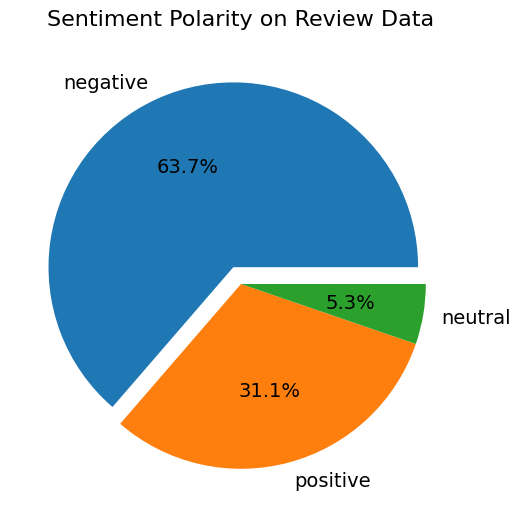

In [37]:
fig, ax = plt.subplots(figsize=(6, 6))

# Mengambil jumlah data polaritas sentimen dari DataFrame 'clean_df' dan menyimpannya dalam list 'sizes'.
sizes = [count for count in clean_df['polarity'].value_counts()]

# Mengambil label atau kategori sentimen dari DataFrame 'clean_df' dan menyimpannya dalam list 'labels'.
labels = list(clean_df['polarity'].value_counts().index)

explode = (0.1, 0,0)

ax.pie(x=sizes, labels=labels, autopct='%1.1f%%', explode=explode, textprops={'fontsize': 14})
ax.set_title('Sentiment Polarity on Review Data', fontsize=16, pad=20)
plt.show()

In [38]:
# Mengatur opsi tampilan Pandas agar kolom dapat menampilkan teks hingga 3000 karakter.
pd.set_option('display.max_colwidth', 3000)
positive_tweets = clean_df[clean_df['polarity'] == 'positive']
positive_tweets = positive_tweets[['text_akhir', 'polarity_score', 'polarity','text_stopword']]
positive_tweets = positive_tweets.sort_values(by='polarity_score', ascending=False)

# Mengatur ulang indeks DataFrame agar dimulai dari 0.
positive_tweets = positive_tweets.reset_index(drop=True)
positive_tweets.index += 1

In [39]:
pd.set_option('display.max_colwidth', 3000)

# Membuat DataFrame baru 'negative_tweets' yang hanya berisi tweet dengan polaritas negatif.
negative_tweets = clean_df[clean_df['polarity'] == 'negative']
# Memilih hanya kolom-kolom tertentu dari DataFrame 'negative_tweets'.
negative_tweets = negative_tweets[['text_akhir', 'polarity_score', 'polarity','text_stopword']]
negative_tweets = negative_tweets.sort_values(by='polarity_score', ascending=True)
negative_tweets = negative_tweets[0:10]
# Mengatur ulang indeks DataFrame agar dimulai dari 0.
negative_tweets = negative_tweets.reset_index(drop=True)
negative_tweets.index += 1

In [40]:
pd.set_option('display.max_colwidth', 3000)

# Membuat DataFrame baru 'negative_tweets' yang hanya berisi tweet dengan polaritas negatif.
neutral_tweets = clean_df[clean_df['polarity'] == 'neutral']
# Memilih hanya kolom-kolom tertentu dari DataFrame 'neutral'.
neutral_tweets = neutral_tweets[['text_akhir', 'polarity_score', 'polarity','text_stopword']]
neutral_tweets = neutral_tweets.sort_values(by='polarity_score', ascending=True)
neutral_tweets = neutral_tweets[0:10]
# Mengatur ulang indeks DataFrame agar dimulai dari 0.
neutral_tweets = neutral_tweets.reset_index(drop=True)
neutral_tweets.index += 1

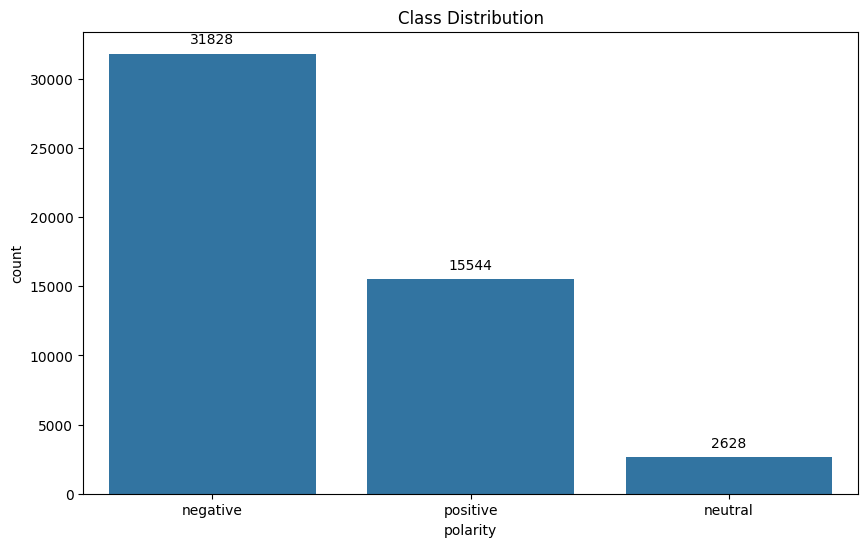

In [41]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Check class distribution
class_dist_plot = sns.countplot(x='polarity', data=clean_df)
plt.title('Class Distribution')

# Add counts above the bars on the plot
for p in class_dist_plot.patches:
    class_dist_plot.annotate(format(p.get_height(), '.0f'),
                              (p.get_x() + p.get_width() / 2., p.get_height()),
                              ha='center', va='center',
                              xytext=(0, 10),
                              textcoords='offset points')

plt.show()



In [42]:
## One Hot Encoding
category = pd.get_dummies(clean_df['polarity'])
category.head()

negative  neutral  positive
0      True    False     False
1      True    False     False
2      True    False     False
3      True    False     False
4     False    False      True

In [43]:
train_df = pd.concat([clean_df,category], axis  =1)
train_df = train_df.drop(columns = 'polarity')
train_df.head()

reviewId         userName  \
0  9af30a9f-37e5-4c80-9eea-a4af87f9f4b7  Pengguna Google   
1  9bd15e3b-7ae1-4827-af1c-f80b9aea4fa2  Pengguna Google   
2  04893854-ffc4-4a5a-bd53-18dda4879354  Pengguna Google   
3  32d316bf-a701-4017-9746-8c3b71dc0892  Pengguna Google   
4  b541e597-ea22-4560-a4c2-a46643e719e1  Pengguna Google   

                                                                                                                  userImage  \
0  https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g   
1  https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g   
2  https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g   
3  https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g   
4  https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g   

                                                                                                                                                                                                                                                                                                                                                                                                                                                            content  \
0                                                                                                                                                                                               bagus sih bagus ,tapi tolong bug nya di perbaiki,terkadang suka ngeleg padahal sinyal masih aman,aku nih pake wifi!masa sinyal nya buruk!! mohon di perhatikan lagi ,di perbaiki,jangan perbarui skin trus , perbarui juga lah sinyal bug di ilang Ngan bisa kan?!!   
1                                                                                                        tiap main rank pasti aja ada player beban/males main, kenapa selalu ada player seperti itu, pengalaman bermainnya jadi tidak menyenangkan, tolong apakah bisa di perbaiki dari segi match making? atau apapun, saya sudah block dan menggunakan fitur hindari player setelah selesai match tetapi selalu saja bertemu player player yang seperti tersebut.   
2  jika setiap update game rank nya selalu saja mengurang ,padahal saya sudah capek untuk menyelesaikan rank nya itu,dan setiap bermain selalu saja mendapat tim yang sangat sangat tidak seimbang(tidak adil)jadi tolong perbsiki terutama soal tim ,coba lebih seimbangkan ,saya selalu ada di tim yg kurang jago sedangkan tim lawan selalu saja menang oleh karna itu rank saya terus turun terus menerus,jadi plis toloong untuk memperbaiki itu saja ,trims .   
3                                                                                                                                                                                                      Bintang 3 aja moonton, grafik sudah oke, efek visual skill dalam pertandingan sudah mantap, skin2 hero keren, cuma masalah yg masih konsisten di matchmaking yang buruk, masalah yg jadi keluhan semua player tapi dibiarin sampai sekarang. Sistem ampas 👎🏾   
4                                                                                                   kemarin install lagi ini game dengan harapan semoga aja gitu kendala yang sering saya rasakan di perbaiki. Ternyata sama saja, setiap saya main rank dan sedang winstreak pasti pertandingan berikutnya akan ada masalah di jaringan (PING) padahal data/wifi saya pribadi tidak ada masalah. semoga tidak terbaca oleh anda developer (MOONTON) Terimakasih...   

   score  thumbsUpCount                   at  \
0      5           1364  2025-04-09 11:13:04   
1      1          16776  2025-03-28 15:42:15   
2      2            493  2025-03

 ## Skema Pelatihan 1

In [44]:
X = train_df['text_akhir'].values
y = train_df[['negative','neutral','positive']].values

In [45]:
import pickle

with open('text_preprocessing.pickle', 'wb') as handle:
    pickle.dump(X, handle, protocol=pickle.HIGHEST_PROTOCOL)
    print("text_preprocessing.pickle has created!")

text_preprocessing.pickle has created!


In [46]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenisasi = Tokenizer(num_words = 100000, oov_token = 'OOV')

tokenisasi.fit_on_texts(X)

In [47]:
def texts_sequences (text):
  sequence = tokenisasi.texts_to_sequences(text)
  return sequence

def pading(sequences):
  pad = pad_sequences(sequences, maxlen = 55)
  return pad

def sequences_padding(text):
  sequences = texts_sequences(text)
  print(sequences)
  pad = pading(sequences)
  return pad

In [48]:
pad_X_sequences = sequences_padding(X)

[[5, 5, 4, 21, 19454, 24, 148, 11, 19455, 39, 19456, 11, 60, 28, 256, 4613, 587, 27, 94, 587, 11, 21, 111, 6595], [3, 19, 9, 10121, 3, 9, 234, 1229, 305, 4, 10, 214, 54, 254, 351, 5166, 134, 5547, 9, 189, 54, 395, 9, 9], [15, 2, 19, 2932, 96, 1439, 19, 8468, 22, 6, 7379, 12922, 4, 12923, 6, 95, 936, 6, 71, 6, 47, 51, 19, 58, 19457, 4, 7380, 243, 68, 12], [23, 8, 84, 186, 298, 1673, 121, 64, 333, 27, 17, 179, 1410, 87, 60, 261, 9, 2098, 14, 352], [272, 785, 2, 1528, 127, 61, 239, 1400, 10, 3, 19, 850, 64, 7, 41, 1994, 810, 127, 3806, 105, 8, 93], [44, 83, 7, 77, 3, 2, 125, 437, 38, 2, 7, 2602, 62, 41, 7, 38, 438, 598, 69, 7, 52, 41, 63, 3409, 4858, 33, 107, 86, 207, 58, 668, 879, 106, 62, 1174], [314, 13, 4614, 45, 851, 5, 107, 5, 3410, 13, 17, 225, 6596, 19458, 8, 10, 19459, 13, 26, 42, 3], [568, 336, 5, 17, 1401, 1181, 3, 19460, 711, 233, 3, 437, 508, 237, 2933, 139, 19461, 568, 12, 23], [2, 5, 4, 500, 21, 2854, 479, 383, 3198, 89, 4373, 692, 479, 2333, 3673, 8, 611, 27, 176], [9, 296

In [49]:
## Train Split Test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(pad_X_sequences, y, test_size = 0.1, random_state = 3)

In [50]:
from tensorflow.keras.layers import LayerNormalization
## LSTM MODEL
model_nlp = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(100000, 100, input_length = pad_X_sequences.shape[1]),
    tf.keras.layers.LSTM(64, dropout = 0.5, return_sequences=True),
    LayerNormalization(),
    tf.keras.layers.LSTM(32, dropout = 0.5,),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation = 'softmax')
])

c:\Users\iki_rhmn\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [51]:

model_nlp.compile(
    optimizer=tf.optimizers.Adam(learning_rate = 0.0001),
    loss = 'CategoricalCrossentropy',
    metrics = ['accuracy']
)

In [52]:
early_stop = EarlyStopping(monitor='accuracy', mode='min', verbose=1, patience=2)


history = model_nlp.fit(
    X_train,
    y_train,
    epochs = 30,
    batch_size = 32,
 #   callbacks = [my_callback],
    callbacks=[early_stop],
    validation_data = (X_test, y_test),
    verbose = 1
)

Epoch 1/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 208s 138ms/step - accuracy: 0.6172 - loss: 0.8426 - val_accuracy: 0.8252 - val_loss: 0.4880
Epoch 2/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 197s 140ms/step - accuracy: 0.8032 - loss: 0.5288 - val_accuracy: 0.8724 - val_loss: 0.3566
Epoch 3/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 205s 142ms/step - accuracy: 0.8664 - loss: 0.3877 - val_accuracy: 0.8808 - val_loss: 0.3216
Epoch 3: early stopping


In [53]:
## Croos Validation
from sklearn.model_selection import KFold

kf = KFold(n_splits=5,random_state=3,shuffle=True)

accuracies = []

label = y


for iteration, data in enumerate(kf.split(pad_X_sequences), start=1):

    data_train   = pad_X_sequences[data[0]]
    target_train = label[data[0]]

    data_test    = pad_X_sequences[data[1]]
    target_test  = label[data[1]]

    model_nlp.compile(
    optimizer=tf.optimizers.Adam(learning_rate = 0.0001),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy'])

    history = model_nlp.fit(
    data_train,
    target_train,
    epochs = 30,
    batch_size = 64,
 #   callbacks = [my_callback],
    callbacks=[early_stop],
    validation_data = (data_test, target_test),
    verbose = 1)

    predictions = model_nlp.predict(X_test)
    y_pred = predictions

    # for the current fold only

    accuracy = accuracy_score(y_test.argmax(axis=1), y_pred.argmax(axis=1))

    print()
    print("Training ke-", iteration)
    print(classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1)))
    print("======================================================")

   # plot_history(history)

    accuracies.append(accuracy)

# this is the average accuracy over all folds

average_accuracy = np.mean(accuracies)

Epoch 1/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 123s 178ms/step - accuracy: 0.8948 - loss: 0.3045 - val_accuracy: 0.9103 - val_loss: 0.2470
Epoch 2/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 145s 183ms/step - accuracy: 0.9065 - loss: 0.2626 - val_accuracy: 0.9109 - val_loss: 0.2403
Epoch 3/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 122s 195ms/step - accuracy: 0.9159 - loss: 0.2368 - val_accuracy: 0.9117 - val_loss: 0.2420
Epoch 3: early stopping
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step

Training ke- 1
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      3226
           1       1.00      0.01      0.02       253
           2       0.88      0.90      0.89      1521

    accuracy                           0.91      5000
   macro avg       0.93      0.63      0.62      5000
weighted avg       0.91      0.91      0.88      5000

Epoch 1/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 132s 196ms/step - accuracy: 0.9132 - loss: 0.2431 - val_accuracy: 0.9368 - val_loss: 0.1467
Epoch 2/3

 ## Skema Pelatihan 2

In [54]:
tfidf = TfidfVectorizer()
train_tfidf = tfidf.fit_transform(train_df['text_akhir'].tolist())

In [55]:
y = train_df[['negative','neutral','positive']].values


In [56]:

## Split train dataset

X_train_mlp, X_test_mlp, y_train_mlp, y_test_mlp = train_test_split(train_tfidf, y, test_size = 0.2, random_state = 1)

In [57]:
## MLP Classifier Model
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(activation= 'relu',solver = 'adam',hidden_layer_sizes=(30),max_iter = 100, alpha = 0.008, verbose = True, epsilon = 1e-5, random_state = 123, learning_rate_init= 0.1, early_stopping=True, warm_start = True)

clf.fit(X_train_mlp, y_train_mlp)

Iteration 1, loss = 1.06558299
Validation score: 0.849000
Iteration 2, loss = 1.02865408
Validation score: 0.863250
Iteration 3, loss = 1.01119459
Validation score: 0.860250
Iteration 4, loss = 0.97811139
Validation score: 0.856250
Iteration 5, loss = 0.95589837
Validation score: 0.860750
Iteration 6, loss = 0.91664820
Validation score: 0.856750
Iteration 7, loss = 0.90951435
Validation score: 0.858500
Iteration 8, loss = 0.89840819
Validation score: 0.861500
Iteration 9, loss = 0.88694135
Validation score: 0.859250
Iteration 10, loss = 0.88132352
Validation score: 0.872500
Iteration 11, loss = 0.86560536
Validation score: 0.869000
Iteration 12, loss = 0.86867578
Validation score: 0.874250
Iteration 13, loss = 0.86403005
Validation score: 0.868250
Iteration 14, loss = 0.85514769
Validation score: 0.863000
Iteration 15, loss = 0.86449539
Validation score: 0.855250
Iteration 16, loss = 0.84861564
Validation score: 0.863250
Iteration 17, loss = 0.86553178
Validation score: 0.862250
Iterat

MLPClassifier(alpha=0.008, early_stopping=True, epsilon=1e-05,
              hidden_layer_sizes=30, learning_rate_init=0.1, max_iter=100,
              random_state=123, verbose=True, warm_start=True)

 ## Skema Pelatihan 3

In [58]:

## Split train dataset

X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(train_tfidf, y, test_size = 0.2, random_state = 1)

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

# Membuat objek model Logistic Regression
logistic_regression = LogisticRegression()

# Membuat objek LabelEncoder untuk mengubah label multi-class menjadi label numerik
label_encoder = LabelEncoder()

# Mengubah label multi-class (negative, neutral, positive) menjadi label numerik (0, 1, 2)
y_train_lr_encoded = label_encoder.fit_transform(np.argmax(y_train_lr, axis=1))
y_test_lr_encoded = label_encoder.transform(np.argmax(y_test_lr, axis=1))

# Melatih model Logistic Regression pada data pelatihan menggunakan label numerik
logistic_regression.fit(X_train_lr, y_train_lr_encoded)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_lr = logistic_regression.predict(X_train_lr)
y_pred_test_lr = logistic_regression.predict(X_test_lr)

# Evaluasi akurasi model Logistic Regression pada data pelatihan
accuracy_train_lr = accuracy_score(y_pred_train_lr, y_train_lr_encoded)

# Evaluasi akurasi model Logistic Regression pada data uji
accuracy_test_lr = accuracy_score(y_pred_test_lr, y_test_lr_encoded)

# Menampilkan akurasi
print('Logistic Regression - accuracy_train:', accuracy_train_lr)
print('Logistic Regression - accuracy_test:', accuracy_test_lr) 

Logistic Regression - accuracy_train: 0.927375
Logistic Regression - accuracy_test: 0.8966


## **Save Model**

In [68]:
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer


joblib.dump(tfidf, 'vectorizer.pkl')             # untuk NLP
joblib.dump(clf, 'mlp_model.pkl')               # MLP Classifier
joblib.dump(logistic_regression, 'logistic_model.pkl')     # Logistic Regression
joblib.dump(label_encoder, 'label_encoder.pkl')


['label_encoder.pkl']